## Data import and cleaning

The data are contained in two separate csv files. These need to be imported into pandas and merged with an 'inner join' method. While I could perform the join on one column, 'FIPS' (the Federal Information Processing Standards code (FIPS) which uniquely identifies counties and county equivalents in the United States), I also join on 'State' and 'County' names in the event that the county code is erroneously entered. This assures that the join will be correct.

In [49]:
import pandas as pd
import numpy as np

#Read in two csv files as dataframes: df_addtl and df_ranked
df_addtl = pd.read_csv('AddtMeasure.csv')
df_rank = pd.read_csv('RankMeasure.csv')

#Get the shape of each df to check if they loaded properly and reference for join
print(df_addtl.shape)
print(df_rank.shape)


(3136, 38)
(3136, 39)


In [50]:
#Perform an inner join on 'FIPS', 'State', 'County': df
left = df_addtl
right = df_rank

df = pd.merge(left, right, on=['fips', 'state', 'county'], how='inner')

#Get shape of merged dataframe, name of columns, and columns that are not numeric
print('The data frame is now (rows, columns):  ', df.shape)
print('')
print(df.columns)

print(df.get_dtype_counts())
objcol = list(df.select_dtypes(include=['object']).columns)
print('\nColumns that are not numeric:  ',objcol)
df.head()

The data frame is now (rows, columns):   (3134, 74)

Index(['fips', 'state', 'county', 'aamort', 'chmort', 'infmort', 'physdistr',
       'mentdistr', 'diabetic', 'hiv', 'foodins', 'healthyfood', 'drugmort',
       'mvmort', 'sleep', 'uninsure', 'chuninsure', 'healthcost', 'othpcp',
       'othpcpratio', 'disconyouth', 'houseincome', 'freelunch', 'segbw',
       'segnww', 'homicide', 'firearm', 'under18', 'over65', 'aframer',
       'amerindian', 'asian', 'hawaiin', 'hispanic', 'nonhispanicw',
       'nonenglish', 'female', 'rural', 'lifelost', 'fairhealth', 'unhdays',
       'mentunhdeays', 'lowbirth', 'smokers', 'obese', 'foodindex',
       'physinactive', 'accessexercise', 'excdrinking', 'alcoholdrive',
       'chlamydia', 'teenbirth', 'uninsureunder65', 'pcpratio', 'dentratio',
       'mhpratio', 'prevhospital', 'hba1c', 'mammogram', 'graduation',
       'somecollege', 'laborforce', 'unemployed', 'chpoverty', 'chpovertyb',
       'chpovertyhis', 'chpovertyw', '80income', '20income'

,fips,state,county,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,...,chpovertyb,chpovertyhis,chpovertyw,80income,20income,singparent,socialassoc,violcrime,severehous,commute
0,1001,Alabama,Autauga,468.0,55.0,7.0,12,13,13,205.0,...,43.0,NaN,11.0,97896.0,22695.0,25.0,13.7,266.0,15,43
1,1003,Alabama,Baldwin,361.0,48.0,6.0,12,12,10,169.0,...,50.0,12.0,14.0,99839.0,22065.0,27.0,11.5,217.0,15,38
2,1005,Alabama,Barbour,440.0,66.0,12.0,16,15,18,400.0,...,69.0,52.0,12.0,71011.0,12766.0,56.0,8.2,329.0,16,36
3,1007,Alabama,Bibb,521.0,105.0,12.0,13,13,15,120.0,...,61.0,NaN,18.0,78138.0,18287.0,30.0,10.2,147.0,14,47
4,1009,Alabama,Blount,445.0,44.0,6.0,13,13,14,96.0,...,20.0,57.0,21.0,83484.0,20679.0,27.0,8.5,212.0,12,60


In [51]:


#Create a new dataframe from just the column for drug mortality: df_mort
#df_dmort= df['drugmort']
#df_dmort.to_frame()
#df_dmort.columns = ['drugmort']

df_dmort = df[['drugmort']].copy()

print('Shape of original: df', df.shape)
print(df_dmort.head())
print('shape of new: df_dmort', df_dmort.shape)
print(type(df_dmort))
print('')

#drop the column from the main datafrome:df
df = df.drop(['drugmort'], axis=1)
print('Shape of original after drop: df', df.shape)



Shape of original: df (3134, 74)
   drugmort
0      10.0
1      17.0
2       NaN
3      15.0
4      21.0
shape of new: df_dmort (3134, 1)
<class 'pandas.core.frame.DataFrame'>

Shape of original after drop: df (3134, 73)


There are four columns ('pcpratio', 'mhpratio', 'othpcpratio', 'dentratio') that are reported as ratios in the format  ####:##:## or #####:#. In the following section I will do a string split on the first ':', then convert the columns from strings to numeric (float64). Finally, I will delete the old columns, including 4 new ones that were created in the process.

In [52]:
print(df[['pcpratio', 'mhpratio', 'othpcpratio', 'dentratio']].head())

# In the columns 'pcpratio' 'mhpratio' 'othpcpratio' 'dentratio', string split on ':' 
# Expand is False, then set to True in next cell, otherwise I get an error. 
df['pcp_ratio'] = df['pcpratio'].str.split(pat=':', n=1, expand=False)
df['mhp_ratio'] = df['mhpratio'].str.split(pat=':', n=1, expand=False)
df['oth_pcp_ratio'] = df['othpcpratio'].str.split(pat=':', n=1, expand=False)
df['dent_ratio'] = df['dentratio'].str.split(pat=':', n=1, expand=False)


print(df.head())

df.shape

     pcpratio    mhpratio othpcpratio   dentratio
0  2408:01:00  7907:01:00  4257:01:00  3256:01:00
1  1352:01:00  1198:01:00  2680:01:00  2100:01:00
2  2444:01:00     13245:1  3784:01:00  2649:01:00
3  2501:01:00         NaN  2053:01:00  5646:01:00
4  5247:01:00     14418:1     11535:1  5243:01:00
   fips    state   county  aamort  chmort  infmort  physdistr  mentdistr  \
0  1001  Alabama  Autauga   468.0    55.0      7.0         12         13   
1  1003  Alabama  Baldwin   361.0    48.0      6.0         12         12   
2  1005  Alabama  Barbour   440.0    66.0     12.0         16         15   
3  1007  Alabama     Bibb   521.0   105.0     12.0         13         13   
4  1009  Alabama   Blount   445.0    44.0      6.0         13         13   

   diabetic    hiv      ...        20income  singparent  socialassoc  \
0        13  205.0      ...         22695.0        25.0         13.7   
1        10  169.0      ...         22065.0        27.0         11.5   
2        18  400.0      ...

(3134, 77)

In [53]:
# In the columns 'pcpratio' 'mhpratio' 'othpcpratio' 'dentratio', string split on ':'  and expand to new columns
df['pcp_ratio'] = df['pcpratio'].str.split(pat=':', n=1, expand=True)
df['mhp_ratio'] = df['mhpratio'].str.split(pat=':', n=1, expand=True)
df['oth_pcp_ratio'] = df['othpcpratio'].str.split(pat=':', n=1, expand=True)
df['dent_ratio'] = df['dentratio'].str.split(pat=':', n=1, expand=True)

#Change to numeric values
df['new_pcp_ratio'] = pd.to_numeric(df['pcp_ratio'], errors='coerce')
df['new_mhp_ratio'] = pd.to_numeric(df['mhp_ratio'], errors='coerce')
df['new_othpcp_ratio'] = pd.to_numeric(df['oth_pcp_ratio'], errors='coerce')
df['new_dent_ratio'] = pd.to_numeric(df['dent_ratio'], errors='coerce')


#Drop non-numeric columns
df = df.drop(['pcpratio', 'pcp_ratio', 'mhpratio', 'mhp_ratio', 'othpcpratio', 
                         'oth_pcp_ratio', 'dentratio', 'dent_ratio'], axis=1)


print(df[['new_pcp_ratio', 'new_mhp_ratio', 'new_othpcp_ratio','new_dent_ratio']].dtypes)
print(df[['new_pcp_ratio', 'new_mhp_ratio', 'new_othpcp_ratio','new_dent_ratio']].head())

print('\nThe data frame is now (rows, columns):  ', df.shape)
df.head()

new_pcp_ratio       float64
new_mhp_ratio       float64
new_othpcp_ratio    float64
new_dent_ratio      float64
dtype: object
   new_pcp_ratio  new_mhp_ratio  new_othpcp_ratio  new_dent_ratio
0         2408.0         7907.0            4257.0          3256.0
1         1352.0         1198.0            2680.0          2100.0
2         2444.0        13245.0            3784.0          2649.0
3         2501.0            NaN            2053.0          5646.0
4         5247.0        14418.0           11535.0          5243.0

The data frame is now (rows, columns):   (3134, 73)


,fips,state,county,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,...,20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,1001,Alabama,Autauga,468.0,55.0,7.0,12,13,13,205.0,...,22695.0,25.0,13.7,266.0,15,43,2408.0,7907.0,4257.0,3256.0
1,1003,Alabama,Baldwin,361.0,48.0,6.0,12,12,10,169.0,...,22065.0,27.0,11.5,217.0,15,38,1352.0,1198.0,2680.0,2100.0
2,1005,Alabama,Barbour,440.0,66.0,12.0,16,15,18,400.0,...,12766.0,56.0,8.2,329.0,16,36,2444.0,13245.0,3784.0,2649.0
3,1007,Alabama,Bibb,521.0,105.0,12.0,13,13,15,120.0,...,18287.0,30.0,10.2,147.0,14,47,2501.0,NaN,2053.0,5646.0
4,1009,Alabama,Blount,445.0,44.0,6.0,13,13,14,96.0,...,20679.0,27.0,8.5,212.0,12,60,5247.0,14418.0,11535.0,5243.0


In [54]:
#Change 'fips' column to type object.
df['fips'] = df['fips'].astype(str)
print(df['fips'].dtypes)

#Print the first 5 rows
df.head()


object


,fips,state,county,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,...,20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,1001,Alabama,Autauga,468.0,55.0,7.0,12,13,13,205.0,...,22695.0,25.0,13.7,266.0,15,43,2408.0,7907.0,4257.0,3256.0
1,1003,Alabama,Baldwin,361.0,48.0,6.0,12,12,10,169.0,...,22065.0,27.0,11.5,217.0,15,38,1352.0,1198.0,2680.0,2100.0
2,1005,Alabama,Barbour,440.0,66.0,12.0,16,15,18,400.0,...,12766.0,56.0,8.2,329.0,16,36,2444.0,13245.0,3784.0,2649.0
3,1007,Alabama,Bibb,521.0,105.0,12.0,13,13,15,120.0,...,18287.0,30.0,10.2,147.0,14,47,2501.0,NaN,2053.0,5646.0
4,1009,Alabama,Blount,445.0,44.0,6.0,13,13,14,96.0,...,20679.0,27.0,8.5,212.0,12,60,5247.0,14418.0,11535.0,5243.0


### Choose best measure of center for imputing missing values.

Variables that are normally distributed will have the same value for the mean and median. I will first calculate the difference between the mean and the median and display those variables where the difference is greater than 1. If there are a large number of them, or if the differences are very large, I will use the median as a value to impute missing variables. Otherwise I will use the mean.


In [55]:
#Create a dataframe from the numerical columns.
df_diff = pd.DataFrame(data = df, columns = ['drugmort', 'aamort', 'chmort', 'infmort', 'physdistr',
       'mentdistr', 'diabetic', 'hiv', 'foodins', 'healthyfood', 
       'mvmort', 'sleep', 'uninsure', 'chuninsure', 'healthcost', 'othpcp',
       'disconyouth', 'houseincome', 'freelunch', 'segbw', 'segnww',
       'homicide', 'firearm', 'under18', 'over65', 'aframer', 'amerindian',
       'asian', 'hawaiin', 'hispanic', 'nonhispanicw', 'nonenglish', 'female',
       'rural', 'lifelost', 'fairhealth', 'unhdays', 'mentunhdeays',
       'lowbirth', 'smokers', 'obese', 'foodindex', 'physinactive',
       'accessexercise', 'excdrinking', 'alcoholdrive', 'chlamydia',
       'teenbirth', 'uninsureunder65', 'prevhospital', 'hba1c', 'mammogram',
       'graduation', 'somecollege', 'laborforce', 'unemployed', 'chpoverty',
       'chpovertyb', 'chpovertyhis', 'chpovertyw', '80income', '20income',
       'singparent', 'socialassoc', 'violcrime', 'severehous', 'commute',
       'new_pcp_ratio', 'new_mhp_ratio', 'new_othpcp_ratio', 'new_dent_ratio'])

#Iterate over numerical columns
i = 0
for col in df_diff:
    ave=df_diff[col].mean()
    med=df_diff[col].median()
    diff=abs(ave - med)
    
    #print only those with differences > 1
    if diff > 1:
        i +=1
        print(i, col,  'Difference = ', diff)

1 aamort Difference =  12.101595571475116
2 chmort Difference =  4.657908294693456
3 hiv Difference =  78.00718816067652
4 healthyfood Difference =  2.356732610082961
5 mvmort Difference =  1.8042113040265981
6 chuninsure Difference =  1.4877114586658156
7 healthcost Difference =  50.395913154534355
8 othpcp Difference =  9.49370764762827
9 disconyouth Difference =  1.3537181996086112
10 houseincome Difference =  1795.1519310564981
11 segbw Difference =  1.4087555336940483
12 homicide Difference =  1.0172839506172844
13 aframer Difference =  6.768315252074038
14 amerindian Difference =  1.6077536694320402
15 hispanic Difference =  5.193012125079775
16 nonhispanicw Difference =  7.275845564773263
17 nonenglish Difference =  1.0269623484365022
18 lifelost Difference =  318.1137055837562
19 fairhealth Difference =  1.0213784301212492
20 accessexercise Difference =  2.6965044103234206
21 chlamydia Difference =  67.0965147453083
22 teenbirth Difference =  1.4529236868186288
23 prevhospital 

**CONCLUSION:** More than 1/3 of the variables had a difference of more than 1, and several had very large differences. Therefore I will use the median as a measure of center. 



### Impute missing values
To impute missing values with state medians for each variable, I create a new dataframe with state medians and a new dataframe with the full list of states from the 'state' column from the original data frame. Then I will do an outer-join on 'state'. This will create a dataframe with 1623 rows and 72 columns filled with state median values. I will do a final join with this dataframe and the original dataframe that will fill any null values with state median values. Any remaining null values will be filled with column median values.

In [56]:
#Get state-wide means data for each variable
df_state_med = df.groupby('state').median()
print(type(df_state_med))
print(df_state_med.shape)

#Reset the index to integer indexing
df_state_med = df_state_med.reset_index()
df_state_med.head()

<class 'pandas.core.frame.DataFrame'>
(51, 70)


,state,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,foodins,healthyfood,...,20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,Alabama,499.0,70.0,8.0,14.0,14.0,15.0,171.0,17.0,6.0,...,15673.0,38.0,11.30,345.5,15.0,35.0,2439.0,3491.0,2504.0,3669.5
1,Alaska,357.0,65.0,4.0,10.0,10.0,7.0,80.0,15.0,8.0,...,30000.0,33.0,10.40,363.0,22.0,3.0,1283.5,514.0,833.0,1563.0
2,Arizona,364.0,54.5,7.0,13.0,13.0,11.0,118.0,16.0,12.0,...,18140.0,36.0,5.90,349.0,20.0,21.0,1994.0,1484.0,1547.0,1772.0
3,Arkansas,480.0,75.5,8.0,14.0,13.0,13.0,113.5,19.0,8.0,...,15595.0,36.0,12.40,275.0,14.0,29.0,2240.0,996.0,2166.0,2897.5
4,California,320.0,43.5,5.0,11.5,11.0,9.0,137.0,15.0,5.0,...,21954.0,31.0,6.55,384.5,24.0,31.0,1366.0,365.5,1959.5,1313.0


In [57]:
#Create dataframe with state only column for outerjoin
df_stateonly = df['state']
df_stateonly = df_stateonly.to_frame()
df_stateonly.shape

(3134, 1)

In [58]:
#Perform an outer join on 'state': df_filled
#This gives a dataframe with 1623 rows of state means and 73 columns.
left_statemed = df_state_med
right_statemed = df_stateonly

df_filled = pd.merge(right_statemed, left_statemed, on='state', how='outer')

print('The data frame is now (rows, columns):  ', df_filled.shape)

#Check for missing values
df_null = df_filled.isnull().sum()
df_null[df_null > 0]

The data frame is now (rows, columns):   (3134, 71)


hiv            66
disconyouth     1
dtype: int64

There are still some missing values because some of the columns were  missing data for the whole state and would not have a state mean. The remaining missing values will be filled with the national medians (column medians).

In [59]:
#Replace any remaining missing values with column means
df_meds = df_filled.fillna(df_filled.median())

#Check for missing values
df_meds[df_meds.isnull().any(axis=1)]
df_meds.head()


,state,aamort,chmort,infmort,physdistr,mentdistr,diabetic,hiv,foodins,healthyfood,...,20income,singparent,socialassoc,violcrime,severehous,commute,new_pcp_ratio,new_mhp_ratio,new_othpcp_ratio,new_dent_ratio
0,Alabama,499.0,70.0,8.0,14.0,14.0,15.0,171.0,17.0,6.0,...,15673.0,38.0,11.3,345.5,15.0,35.0,2439.0,3491.0,2504.0,3669.5
1,Alabama,499.0,70.0,8.0,14.0,14.0,15.0,171.0,17.0,6.0,...,15673.0,38.0,11.3,345.5,15.0,35.0,2439.0,3491.0,2504.0,3669.5
2,Alabama,499.0,70.0,8.0,14.0,14.0,15.0,171.0,17.0,6.0,...,15673.0,38.0,11.3,345.5,15.0,35.0,2439.0,3491.0,2504.0,3669.5
3,Alabama,499.0,70.0,8.0,14.0,14.0,15.0,171.0,17.0,6.0,...,15673.0,38.0,11.3,345.5,15.0,35.0,2439.0,3491.0,2504.0,3669.5
4,Alabama,499.0,70.0,8.0,14.0,14.0,15.0,171.0,17.0,6.0,...,15673.0,38.0,11.3,345.5,15.0,35.0,2439.0,3491.0,2504.0,3669.5


In [60]:

#Insert 'fips' and 'county' columns back into the dataframe
df_meds.insert(0, "fips", df['fips'].values)
df_meds.insert(2, "county", df['county'].values)

df_meds.columns == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Now that I have a dataframe with state (or national) means that matches the shape of the original dataframe, I can fill any missing values with values from the median dataframe.

In [61]:
df = df.combine_first(df_meds)
#Check for missing values
df_null = df.isnull().sum()
print(df_null[df_null > 0])
df.shape

Series([], dtype: int64)


(3134, 73)

Add the column for the response variable (drugmort) back into the dataframe (df), then create a new dataframes for training and testing based on missing values for 'drugmort'.

In [62]:
df = pd.concat([df, df_dmort], axis=1)
print(df.shape)

(3134, 74)


### Drop all the rows that have missing values for drug mortality and save into two dataframes:  df_train, df_test. 

As a reminder, the purpose of the project is to predict the missing values for a complete U.S. map of mortality rates. df_test will be the dataset that my final model will use to predict the missing values. At the end, I will join these two datasets once I fill in the missing values in df_test with the predicted values.

In [63]:
#Create training and testing sets
df_train = df[df['drugmort'].notnull()]
print(df_train.shape)
print('')

df_test = df[df['drugmort'].isnull()]
print(df_test.shape)


(1623, 74)

(1511, 74)


### Check variable distributions to determine outliers

Next, I will check for outliers by visualizing the data using a boxplot (these provide good visuals for detecting outliers) and a probability plot (to check if outliers belong to the distribution).

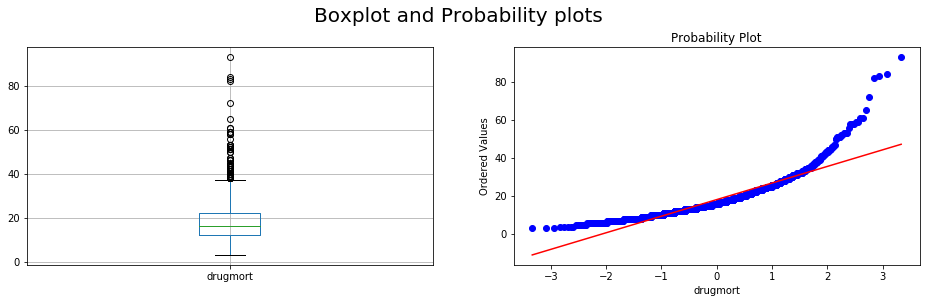

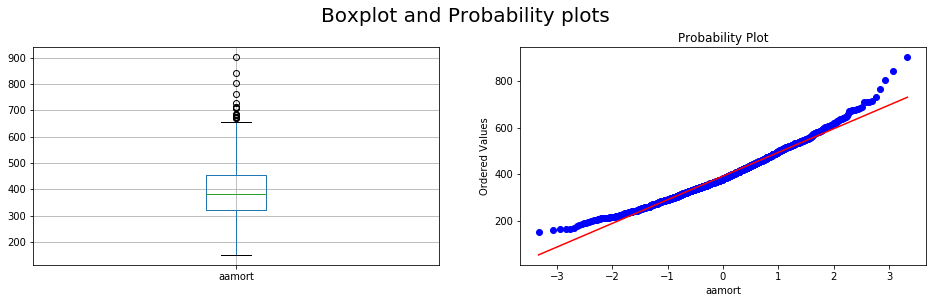

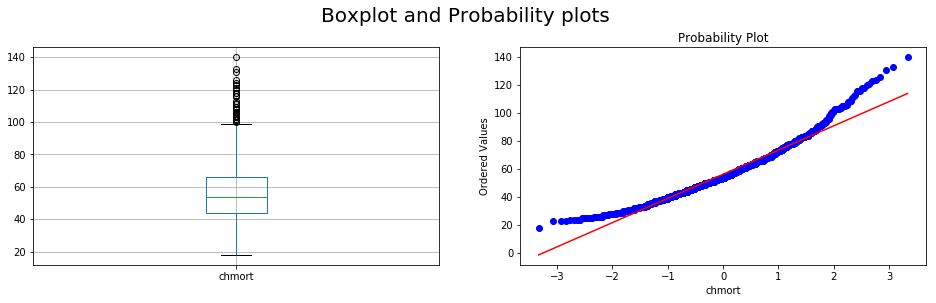

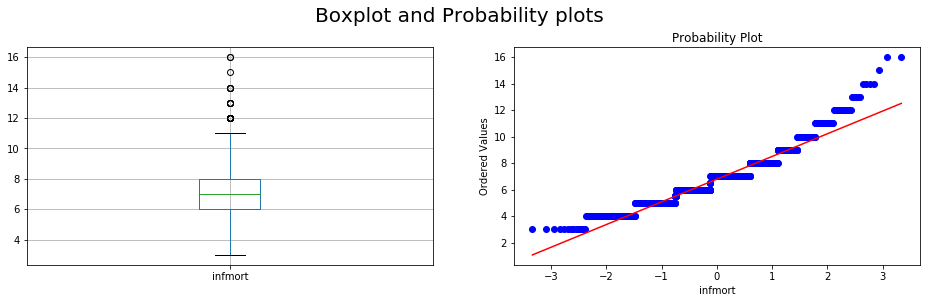

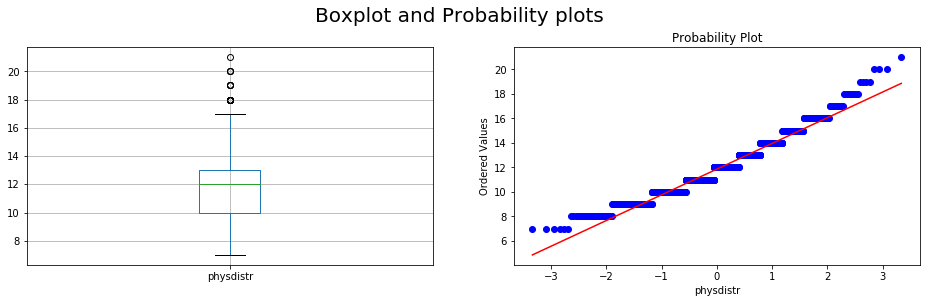

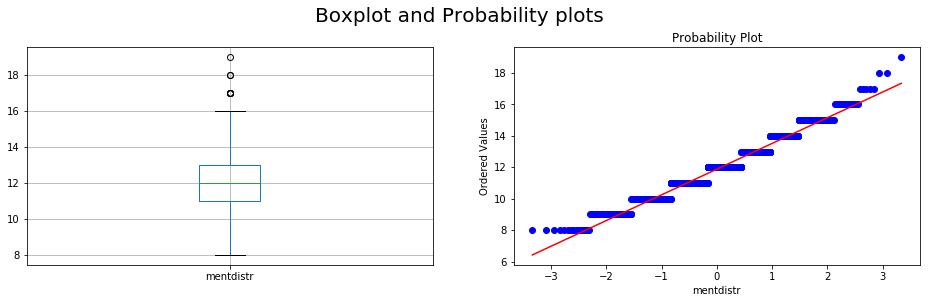

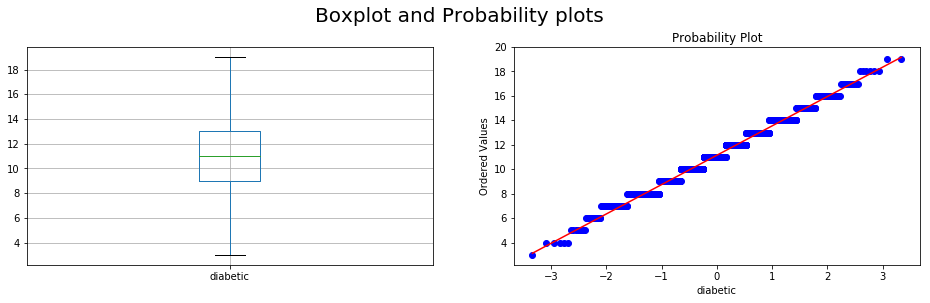

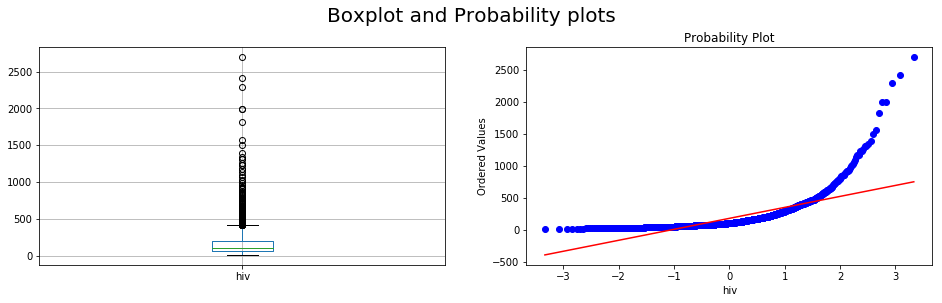

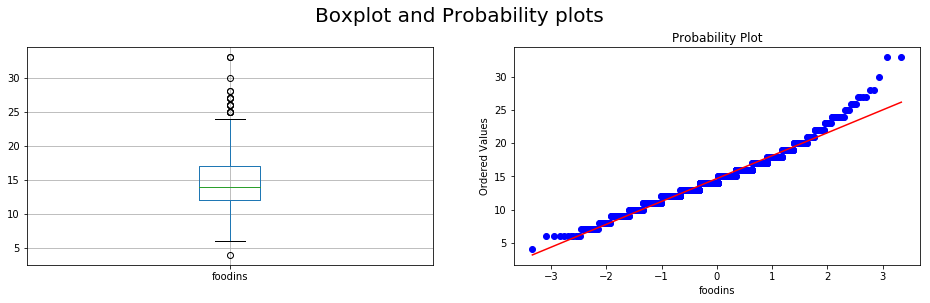

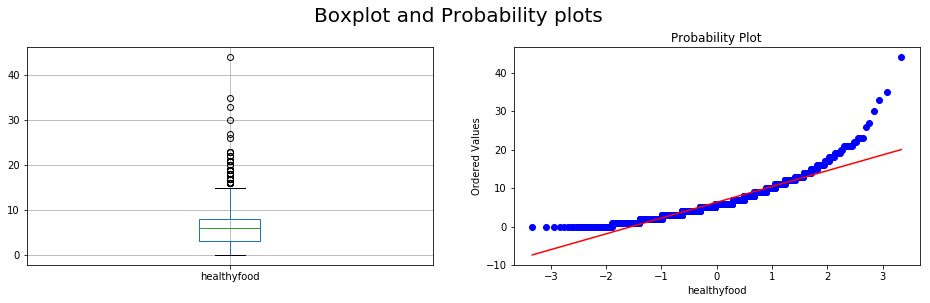

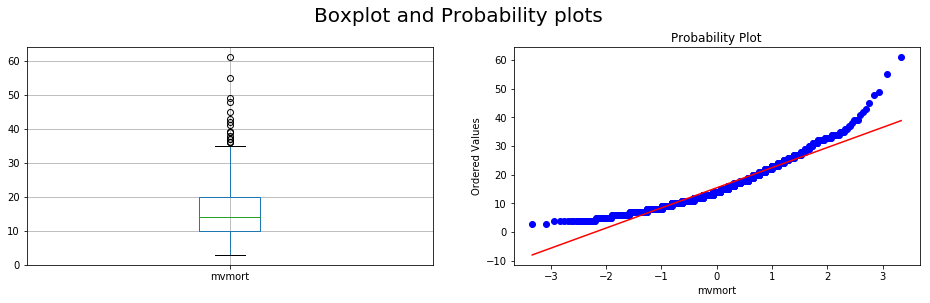

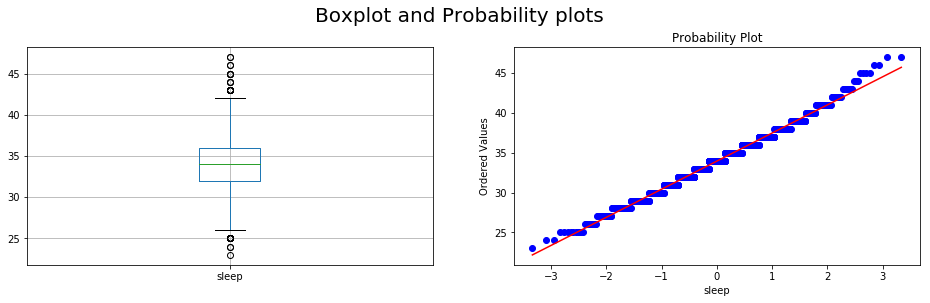

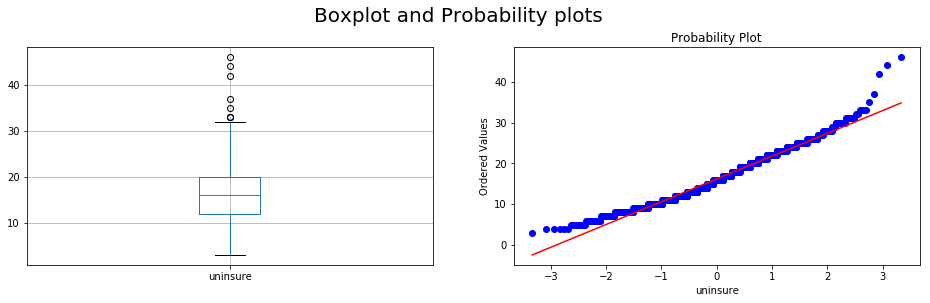

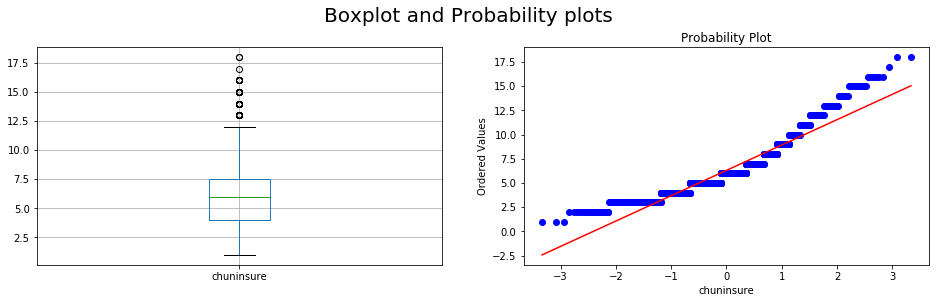

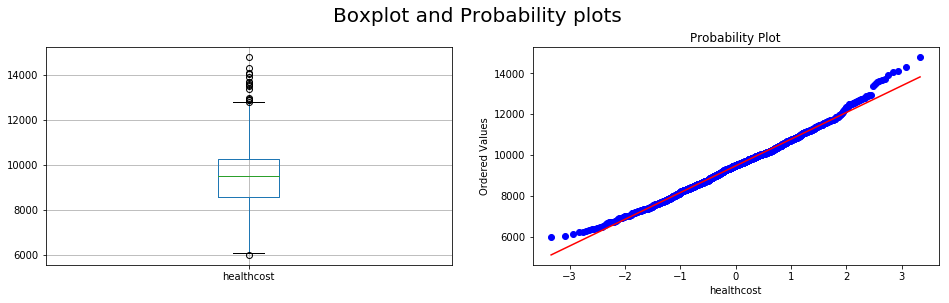

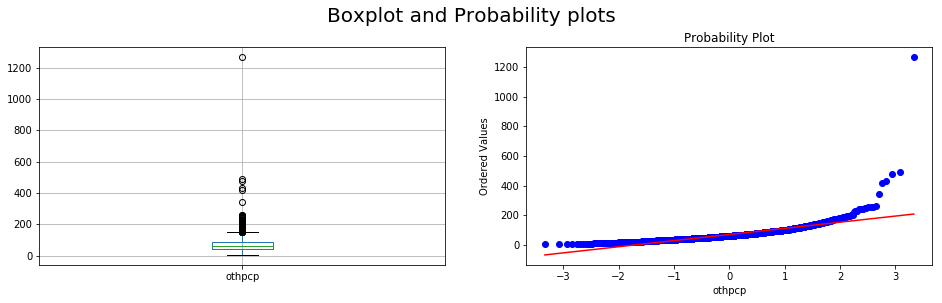

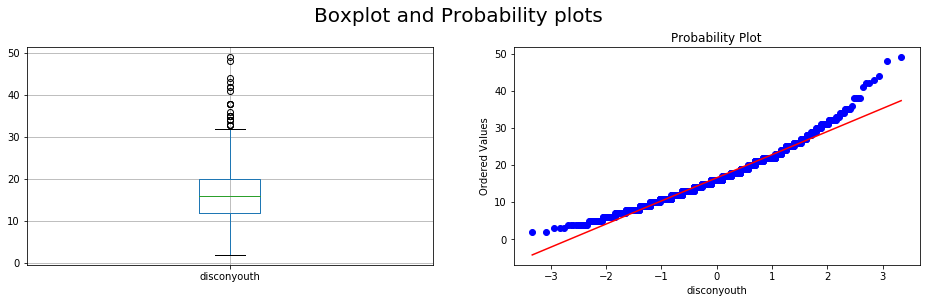

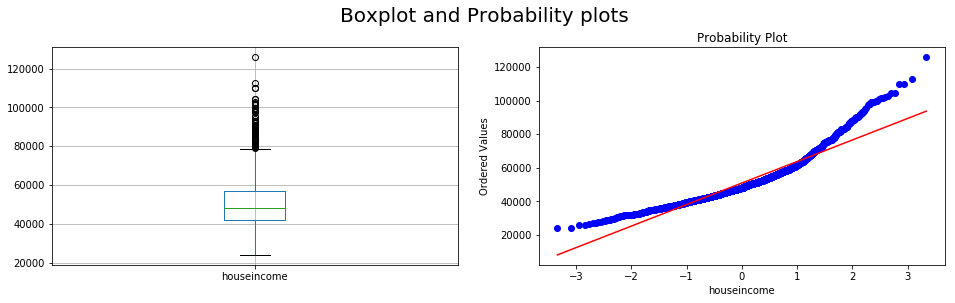

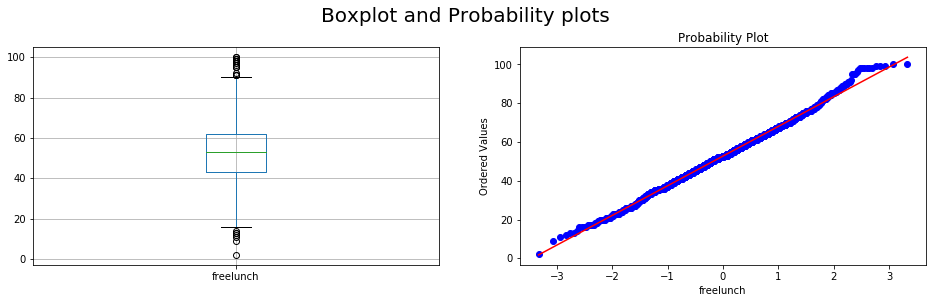

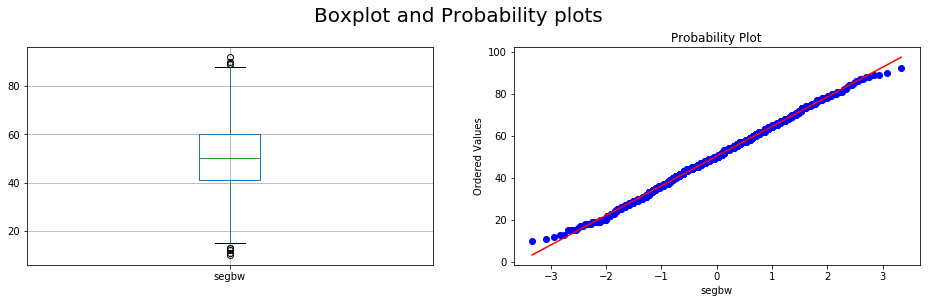

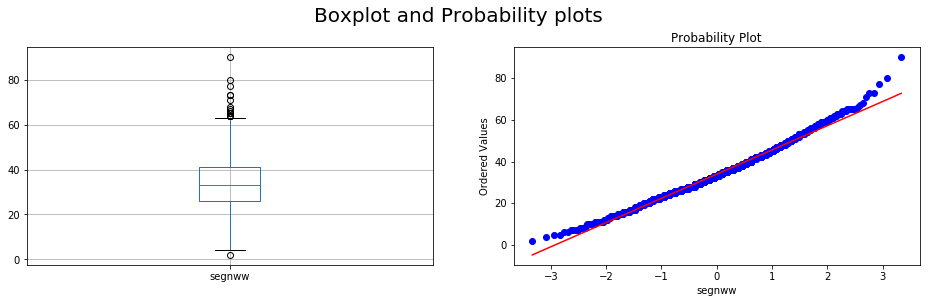

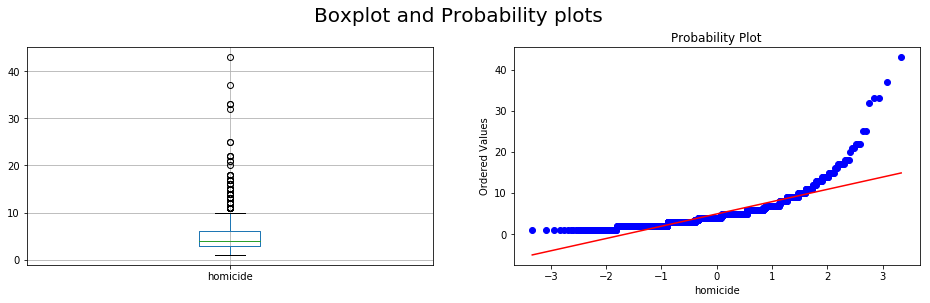

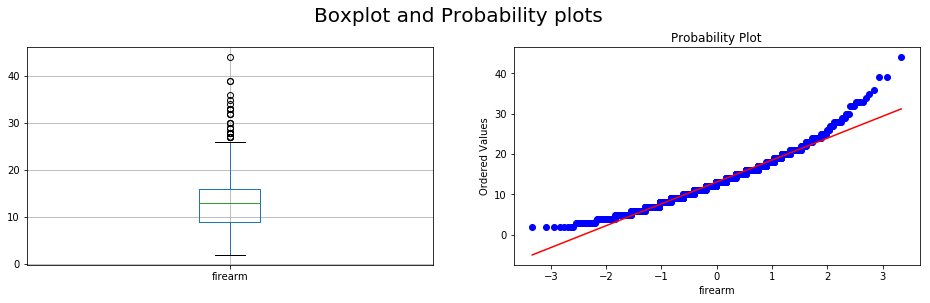

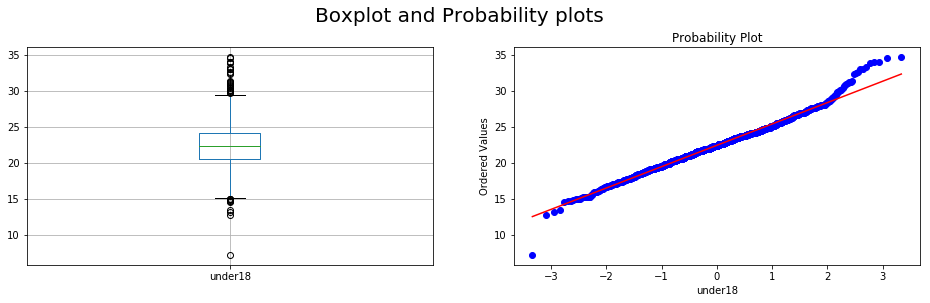

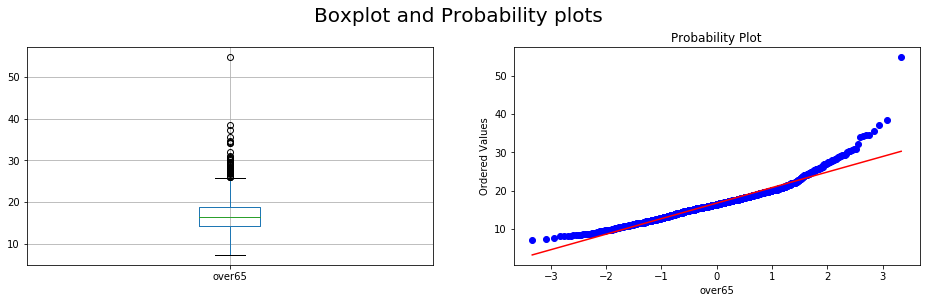

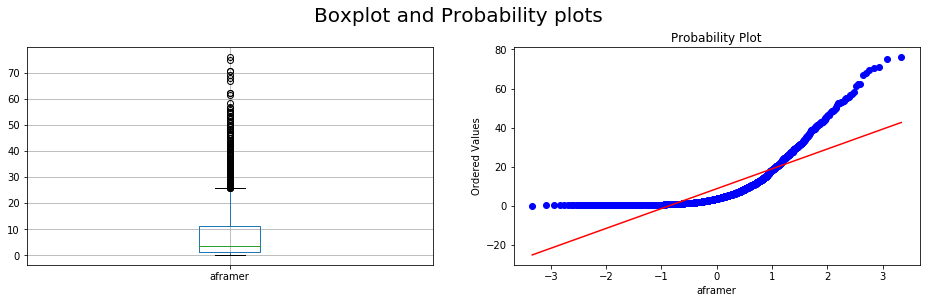

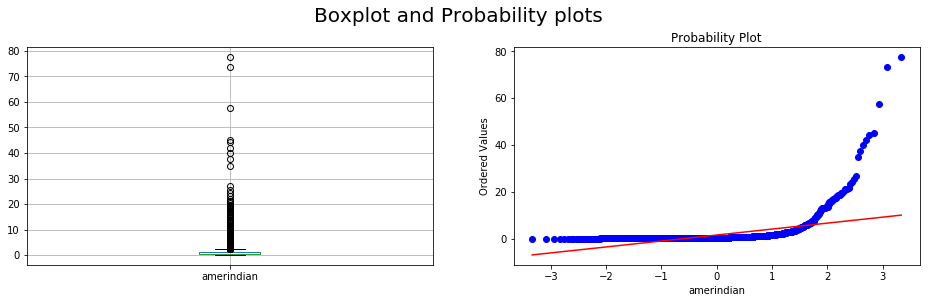

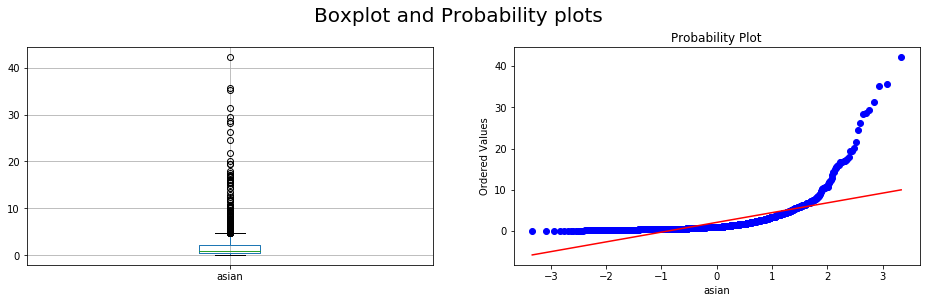

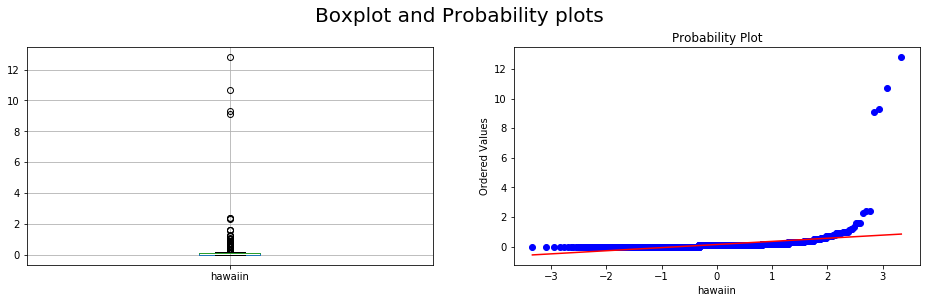

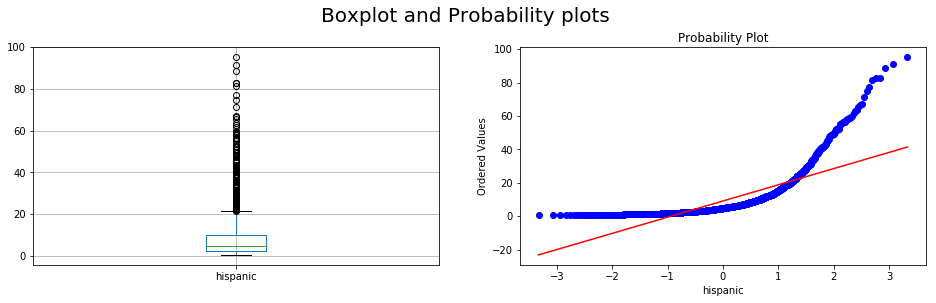

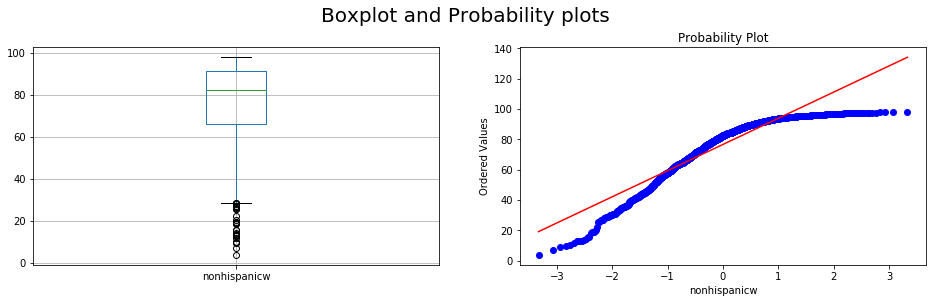

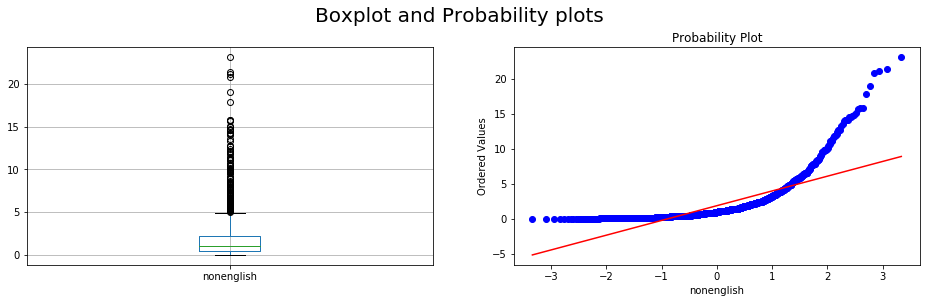

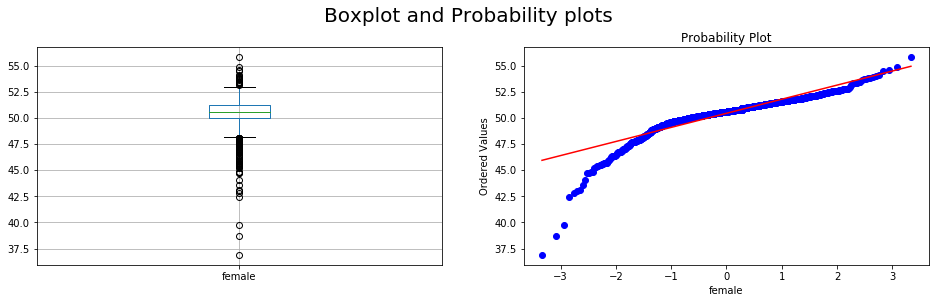

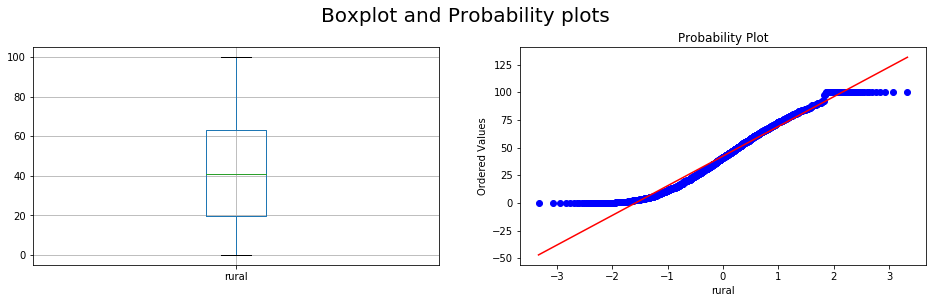

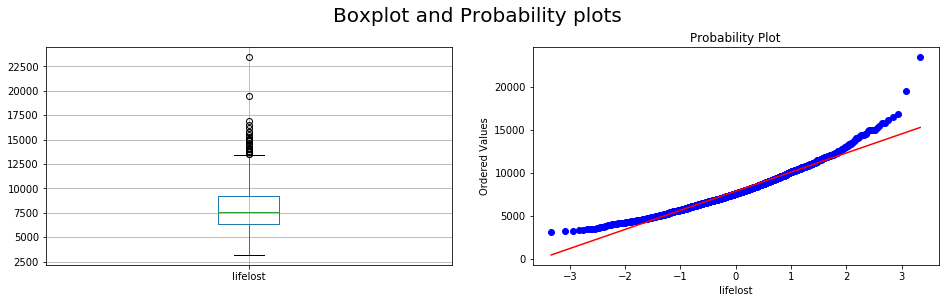

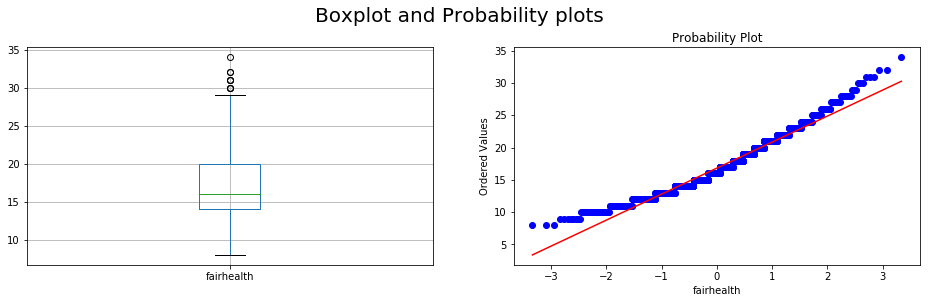

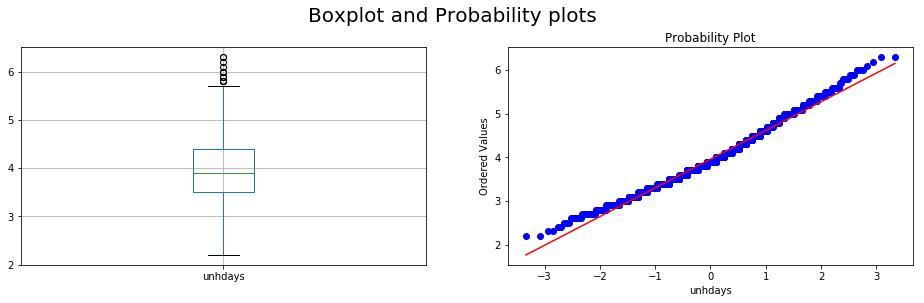

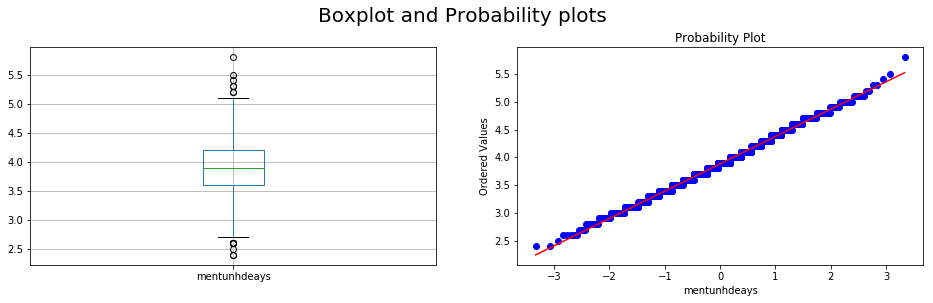

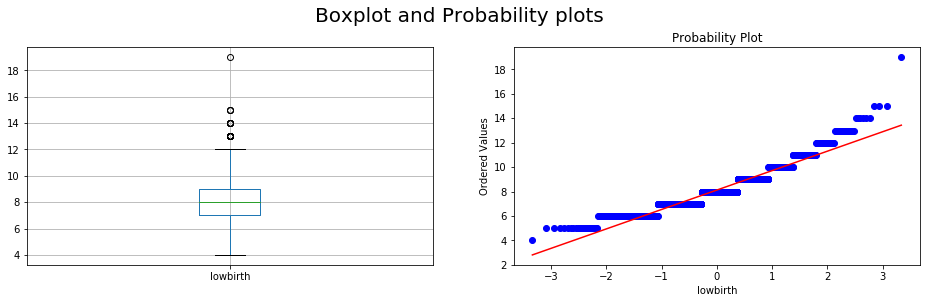

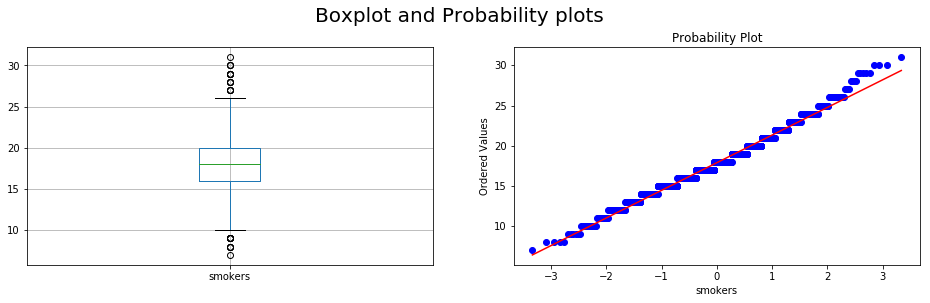

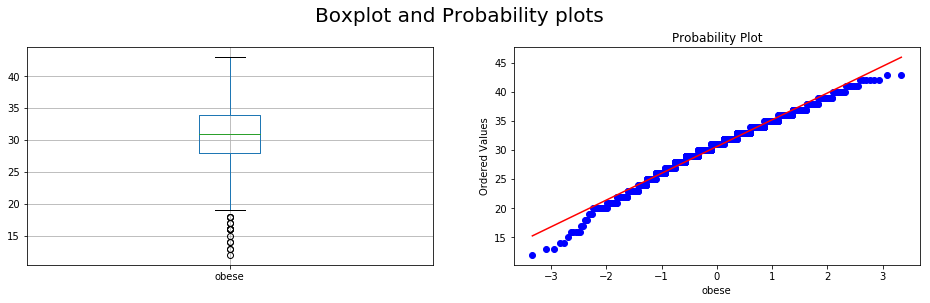

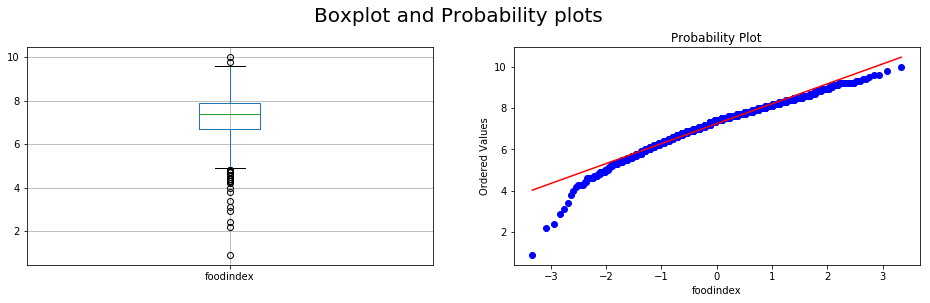

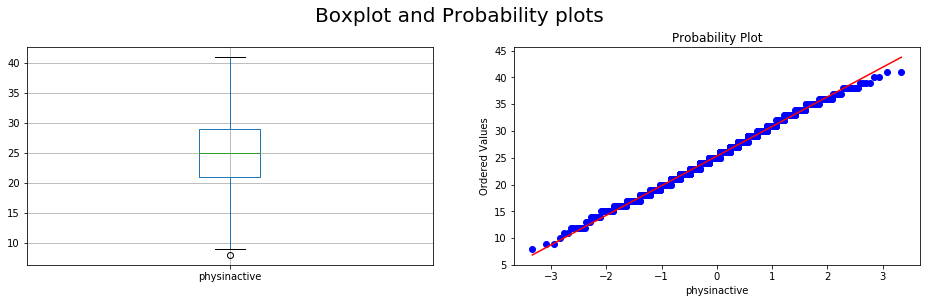

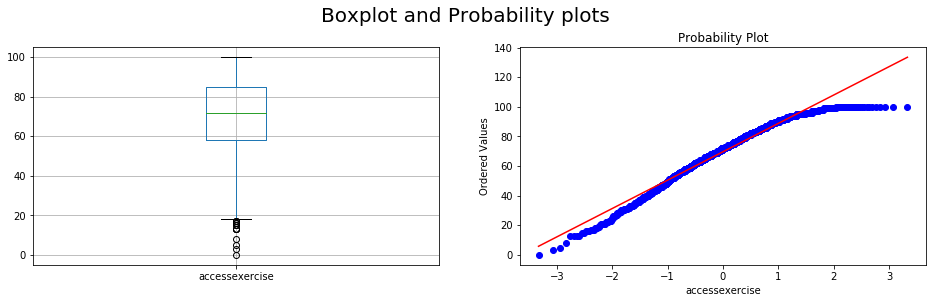

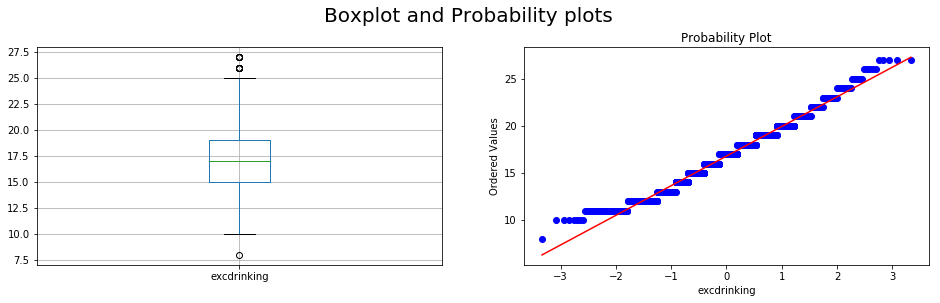

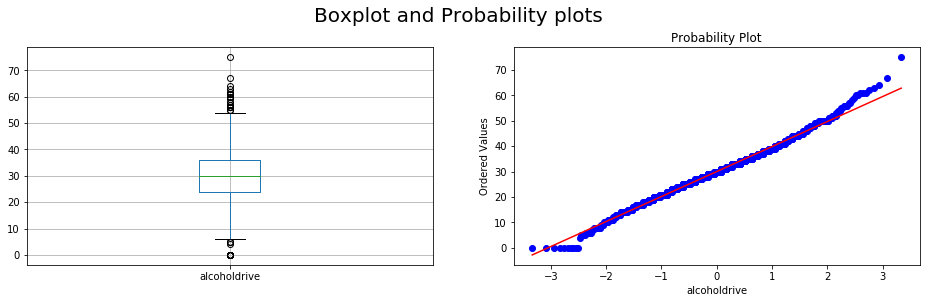

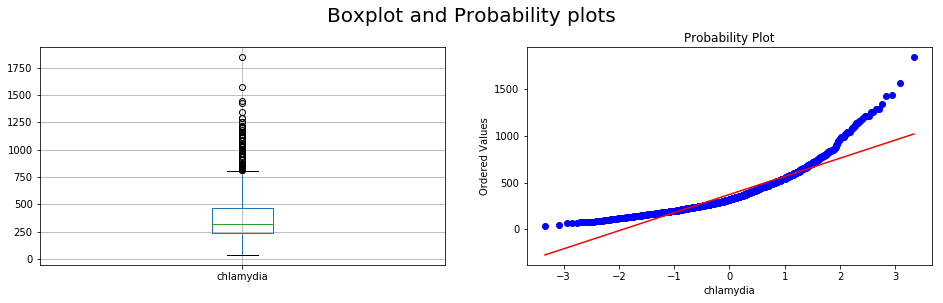

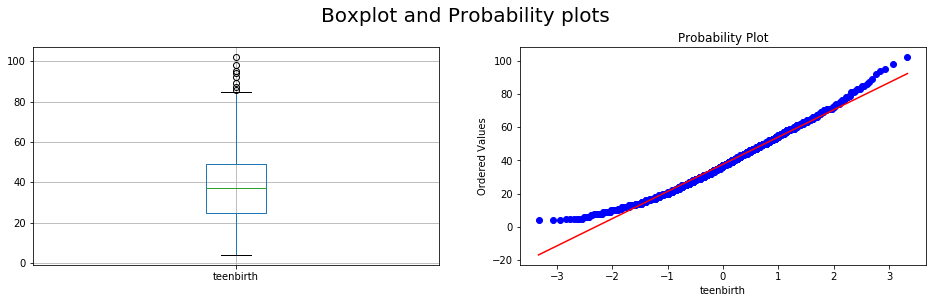

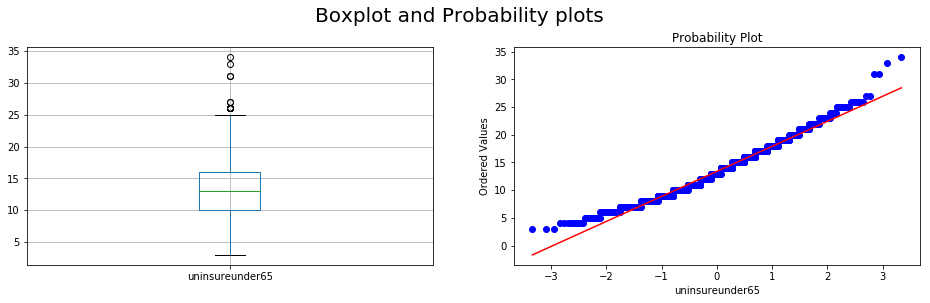

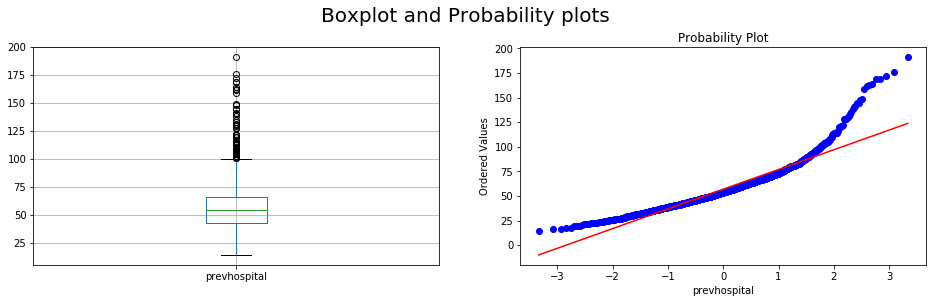

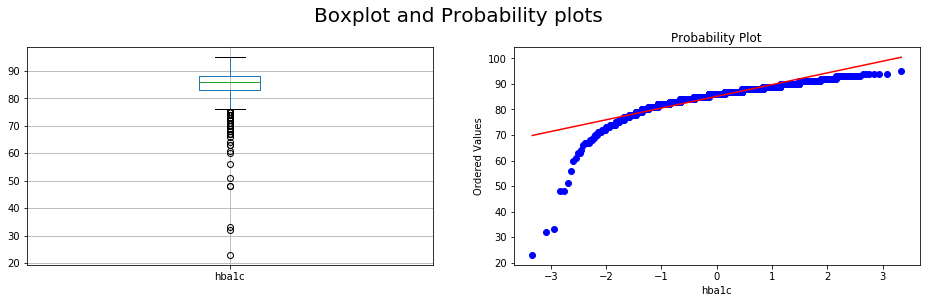

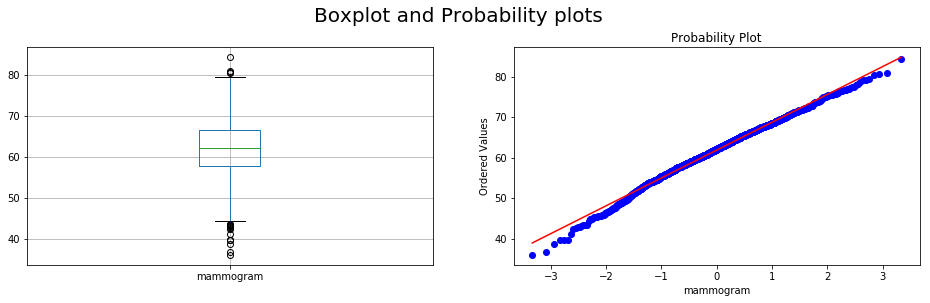

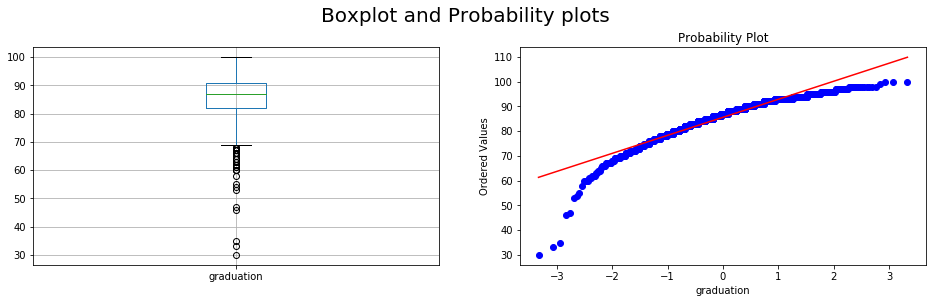

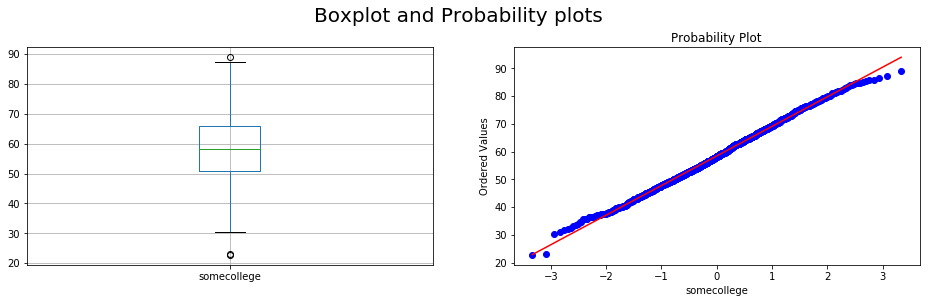

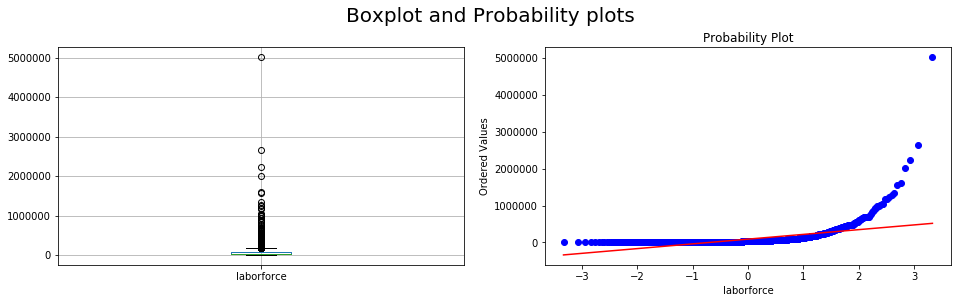

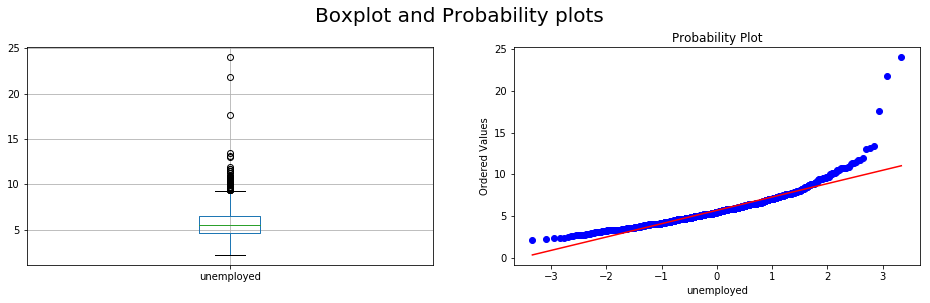

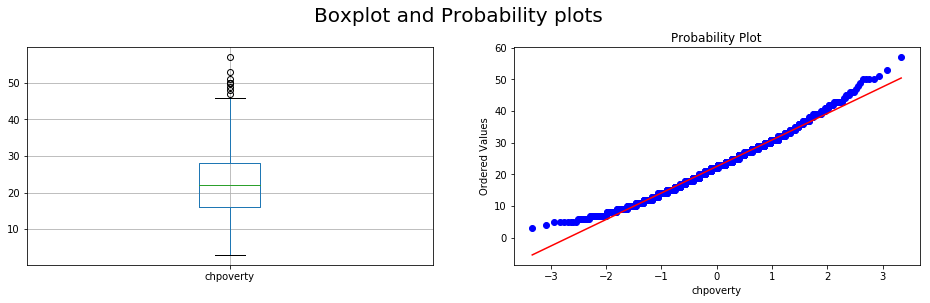

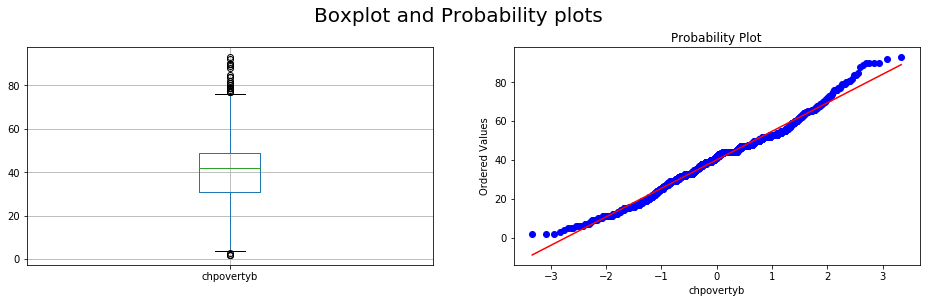

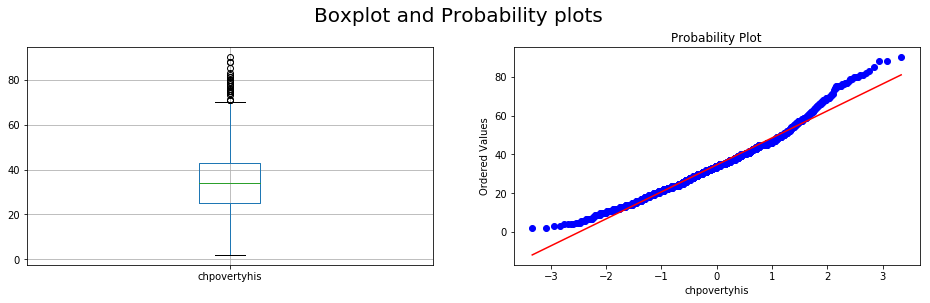

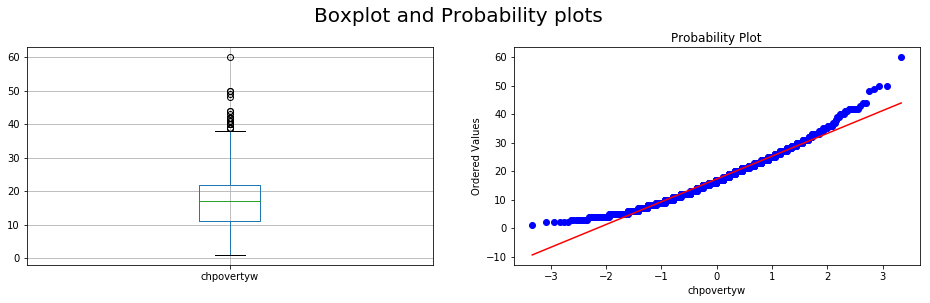

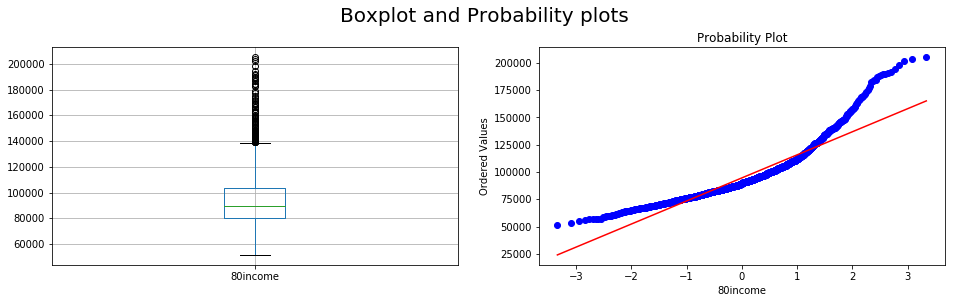

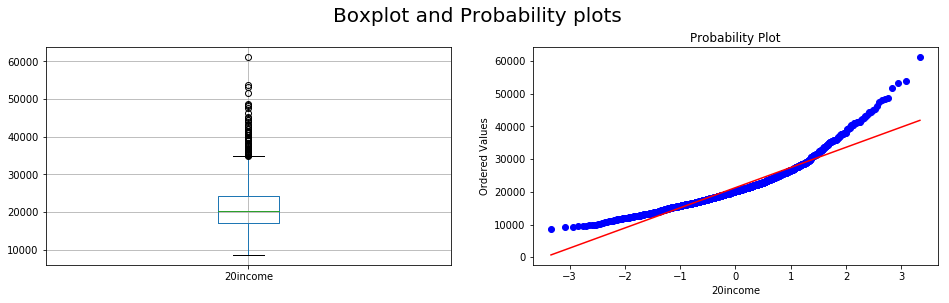

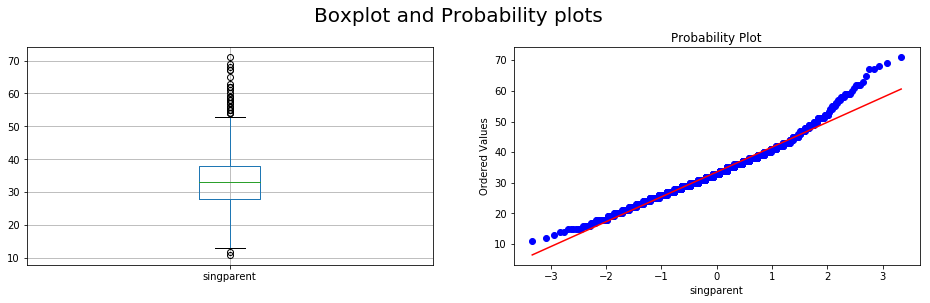

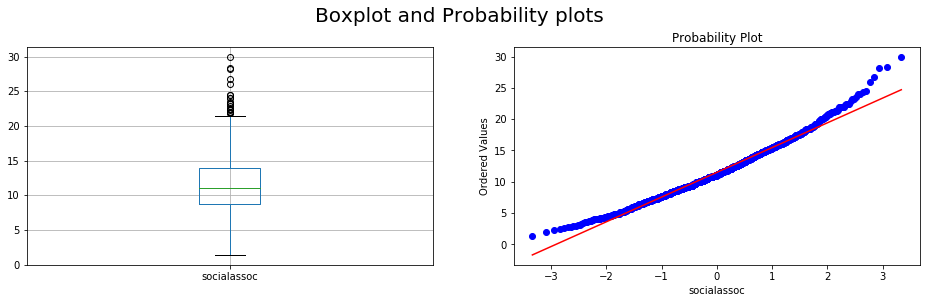

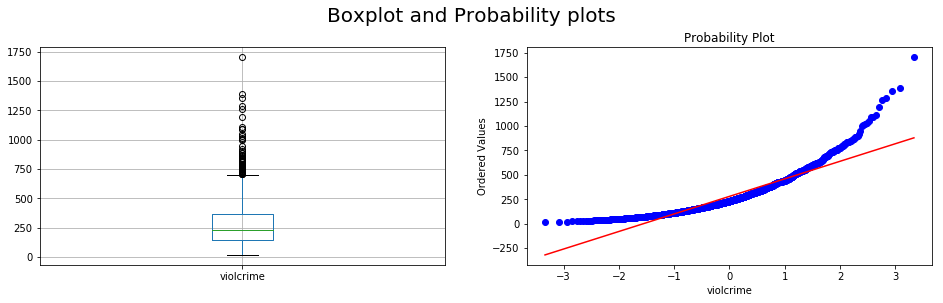

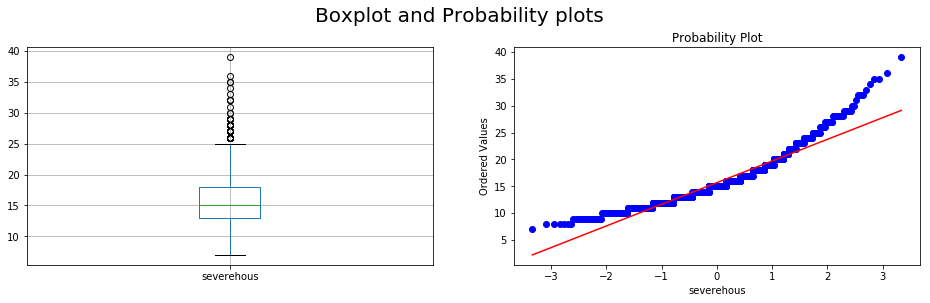

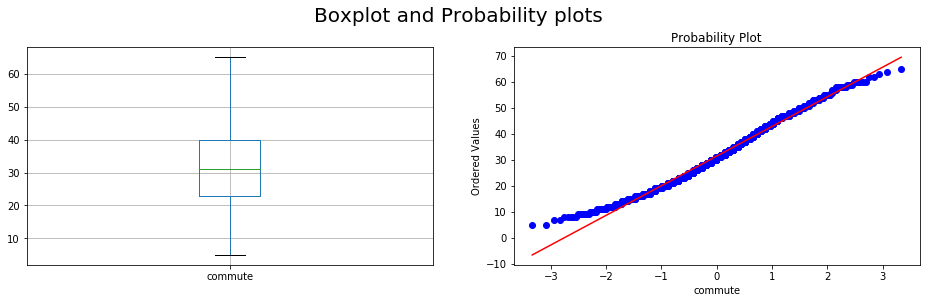

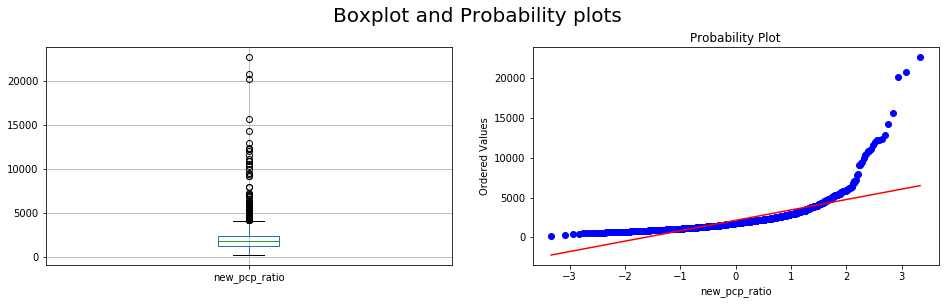

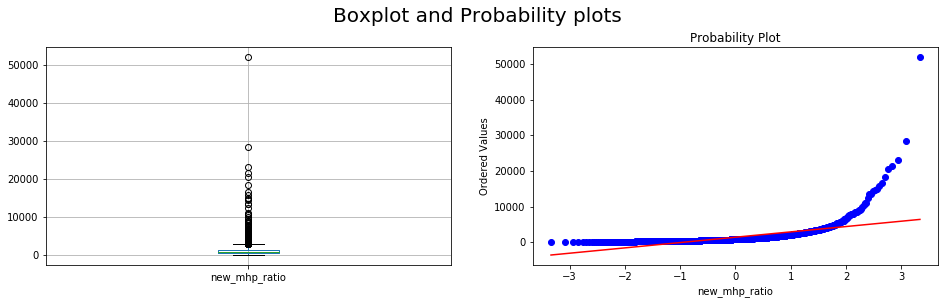

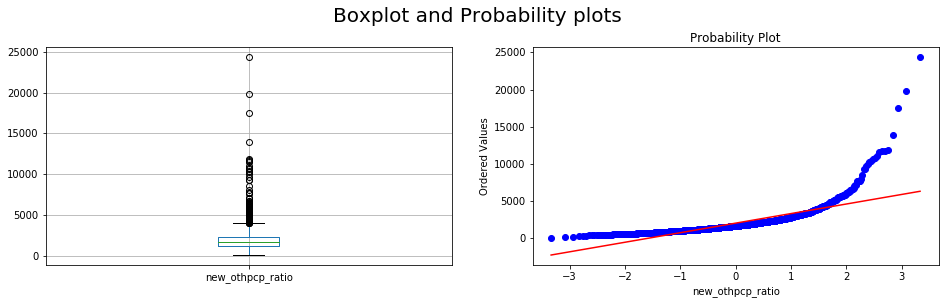

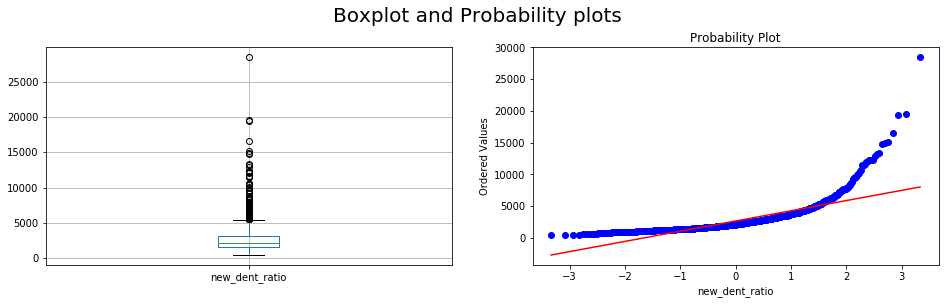

In [64]:
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#Create a dataframe from the numerical columns.
df_plot = pd.DataFrame(data = df_train, columns = ['drugmort', 'aamort', 'chmort', 'infmort', 'physdistr',
       'mentdistr', 'diabetic', 'hiv', 'foodins', 'healthyfood', 
       'mvmort', 'sleep', 'uninsure', 'chuninsure', 'healthcost', 'othpcp',
       'disconyouth', 'houseincome', 'freelunch', 'segbw', 'segnww',
       'homicide', 'firearm', 'under18', 'over65', 'aframer', 'amerindian',
       'asian', 'hawaiin', 'hispanic', 'nonhispanicw', 'nonenglish', 'female',
       'rural', 'lifelost', 'fairhealth', 'unhdays', 'mentunhdeays',
       'lowbirth', 'smokers', 'obese', 'foodindex', 'physinactive',
       'accessexercise', 'excdrinking', 'alcoholdrive', 'chlamydia',
       'teenbirth', 'uninsureunder65', 'prevhospital', 'hba1c', 'mammogram',
       'graduation', 'somecollege', 'laborforce', 'unemployed', 'chpoverty',
       'chpovertyb', 'chpovertyhis', 'chpovertyw', '80income', '20income',
       'singparent', 'socialassoc', 'violcrime', 'severehous', 'commute',
       'new_pcp_ratio', 'new_mhp_ratio', 'new_othpcp_ratio', 'new_dent_ratio'])


#Iterate over the numerical columns of the dataframe to create and display plots
for col in df_plot:
    data = str(col)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
    fig.suptitle('Boxplot and Probability plots',size = 20, y=1.02)
    
    #Generate boxplot
    _ = df_plot.boxplot(column=col, ax=ax1)
    _ = plt.xlabel(data)
    
    #Generate probability plot
    _ = stats.probplot(df_plot[data], plot=plt)
    _ = plt.xlabel(data)
    plt.show()


**CONCLUSION:**  Many of these variables have outliers that are shown by the boxplots and the probability plots. In addition, the plots show that not all of the distributions are normal. I will conduct tests for feature reduction and points of influence, as well as investigate the need for response and feature variable transformations in the following notebook: https://github.com/ValeryLynn/Predicting_Drug_Mortality/blob/master/VLynn_DrugOverdose_EDA_final.ipynb. 

In [65]:
df_train.shape

(1623, 74)

In [66]:
#Send dataframe to csv
df_train.to_csv('VLynn_DrugOverdose_Train.csv')
df_test.to_csv('VLynn_DrugOverdose_Test.csv')